## Import Packages

In [215]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprcessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

# Plot Settings
sns.set(rc= {'figure.figsize': [15, 7]}, font_scale= 1.2)
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning

### Import data

In [165]:
df = pd.read_csv('./exams.csv')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [167]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [168]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [169]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
26,female,group C,some high school,standard,none,53,60,56
829,female,group E,high school,free/reduced,none,33,32,35
609,male,group D,some high school,standard,none,89,73,70
877,male,group E,some college,free/reduced,completed,75,65,66
440,female,group C,high school,standard,completed,53,64,62


In [170]:
df['avg score'] = (df['math score'] + df['reading score'] + df['writing score']) // 3

In [171]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
865,male,group B,some high school,free/reduced,completed,75,74,71,73
883,female,group B,some college,standard,none,70,78,80,76
736,male,group C,associate's degree,standard,completed,90,89,87,88
652,female,group C,some high school,standard,completed,92,100,97,96
258,female,group B,some high school,free/reduced,none,64,79,70,71


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   avg score                    1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [173]:
df['gender'].value_counts()

male      517
female    483
Name: gender, dtype: int64

In [174]:
df['race/ethnicity'].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [175]:
df['parental level of education'].value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64

In [176]:
df['lunch'].value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

In [177]:
df['test preparation course'].value_counts()

none         665
completed    335
Name: test preparation course, dtype: int64

In [178]:
df.drop(['math score', 'reading score', 'writing score'], axis= 1, inplace= True)

df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
586,female,group B,master's degree,standard,completed,68
955,male,group D,associate's degree,standard,completed,80
642,male,group C,master's degree,free/reduced,completed,66
313,male,group E,some college,standard,completed,81
237,female,group D,high school,standard,none,91


In [179]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
avg score                      0
dtype: int64

## Data Visualization

In [180]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
804,male,group C,high school,standard,none,68
929,female,group C,master's degree,standard,none,72
312,male,group C,associate's degree,free/reduced,none,47
249,female,group D,associate's degree,free/reduced,none,79
593,male,group D,bachelor's degree,standard,completed,99


Text(0.5, 1.0, 'Histogram of average scores')

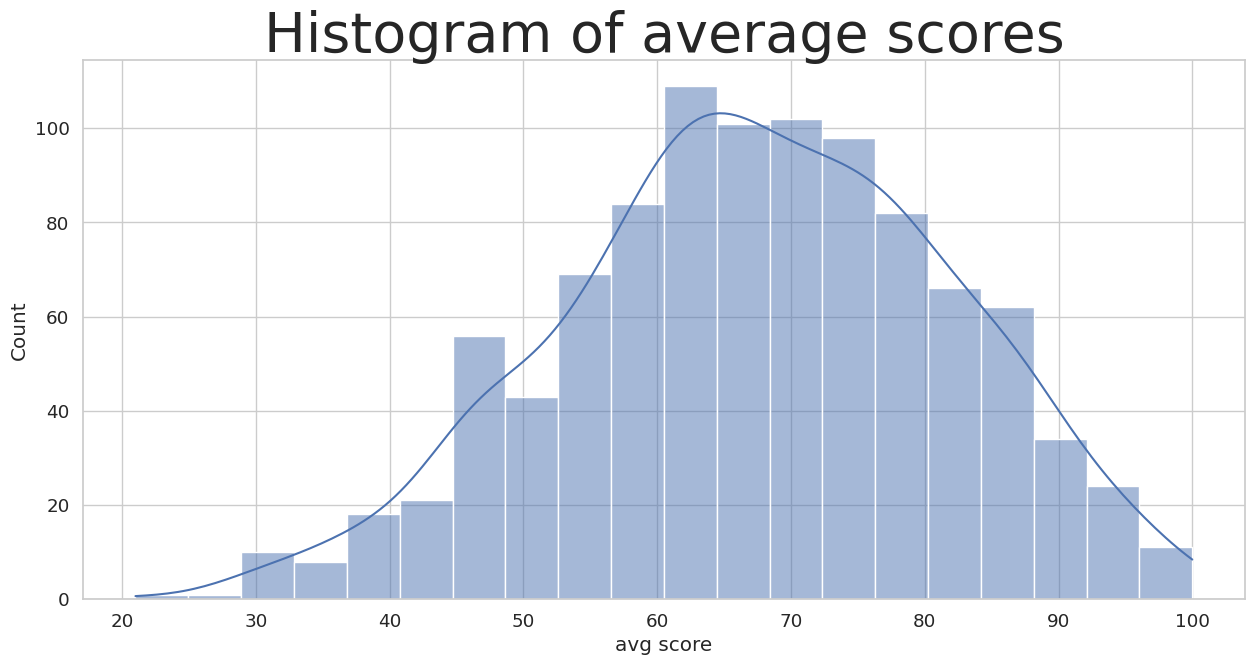

In [229]:
sns.histplot(df['avg score'], kde= True)
plt.title('Histogram of average scores', fontsize= 40)

Text(0.5, 1.0, 'Different ethnical groups count')

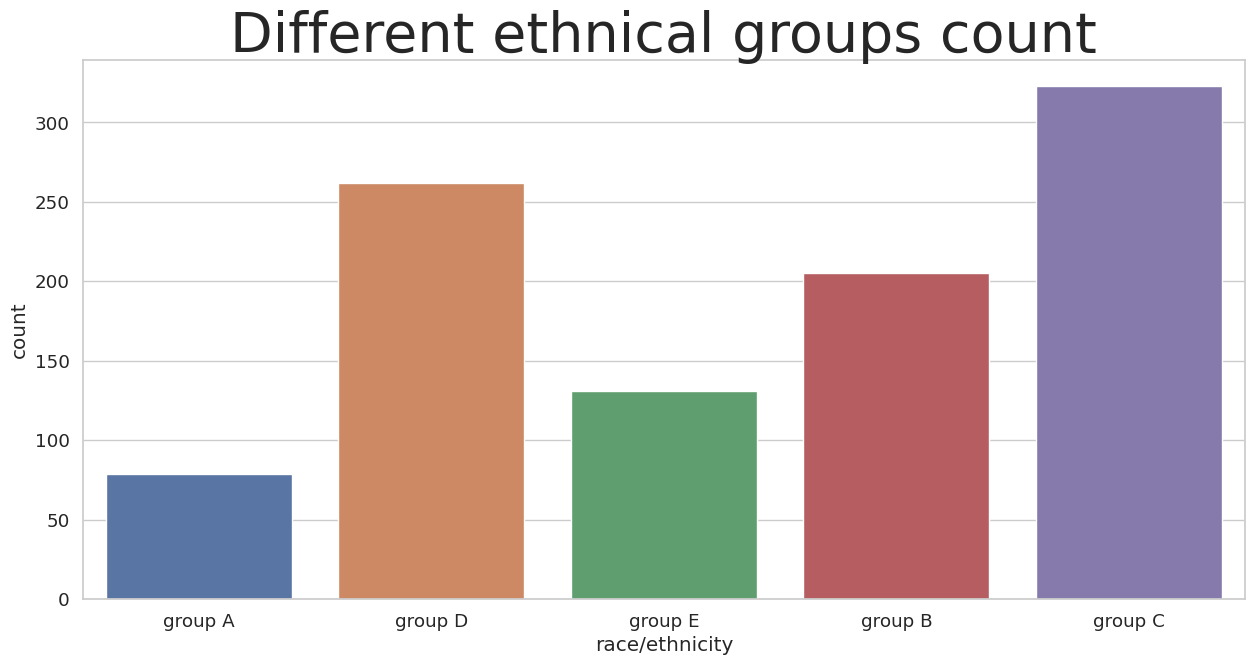

In [181]:
sns.countplot(df['race/ethnicity'])
plt.title('Different ethnical groups count', fontsize= 40)

Text(0.5, 1.0, 'How many students completed preparation course')

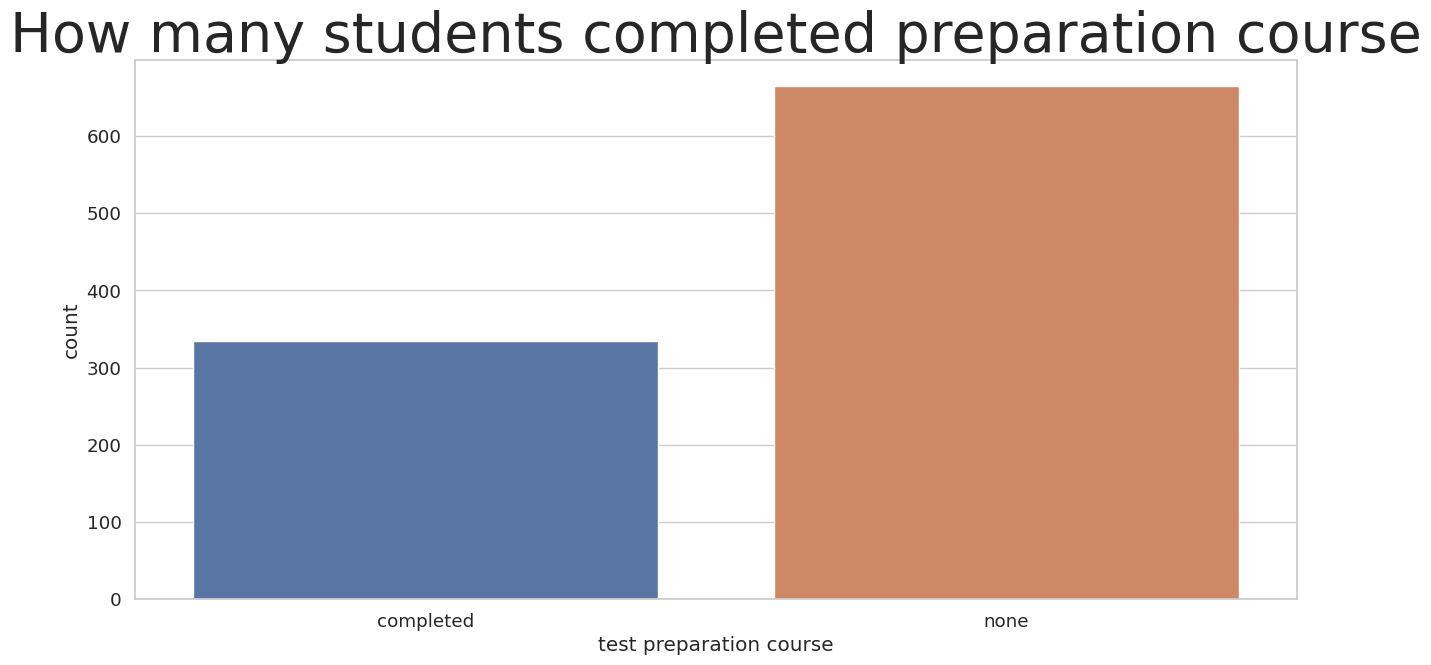

In [182]:
sns.countplot(df['test preparation course'])
plt.title('How many students completed preparation course', fontsize= 40)

Text(0.5, 1.0, 'How score is affected by preparation course')

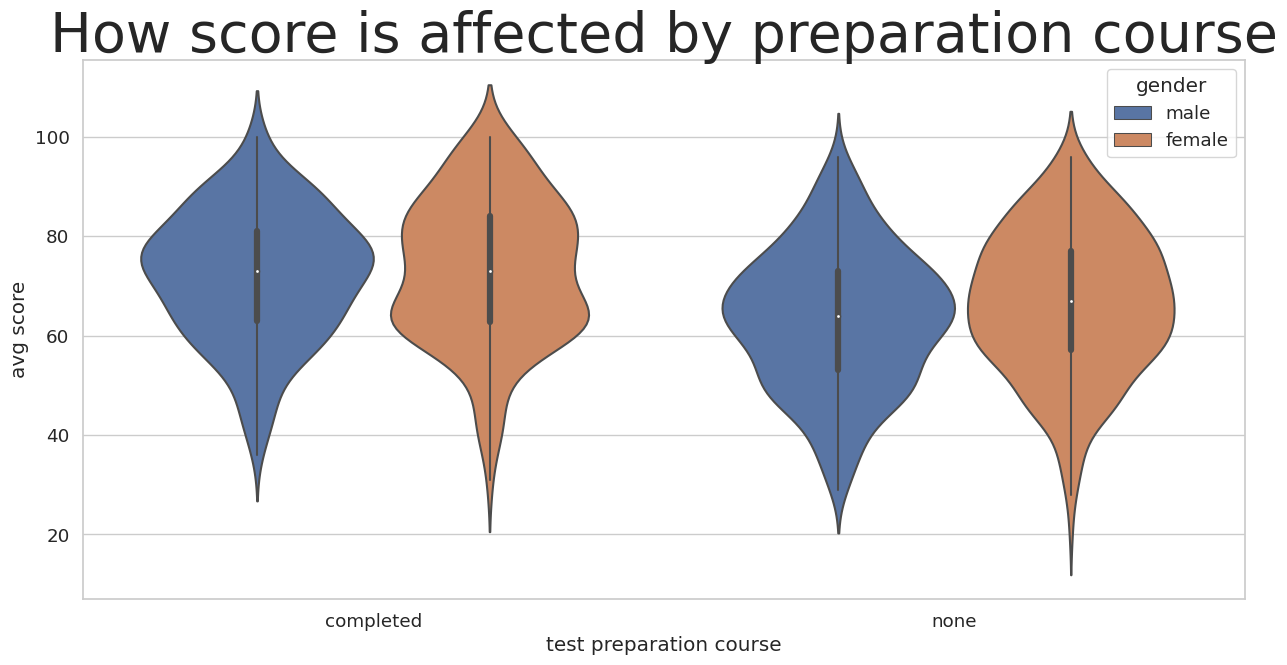

In [183]:
sns.violinplot(x= 'test preparation course', y= 'avg score', hue= 'gender', data= df)
plt.title('How score is affected by preparation course', fontsize= 40)

Text(0.5, 1.0, 'How ethnical group affect score')

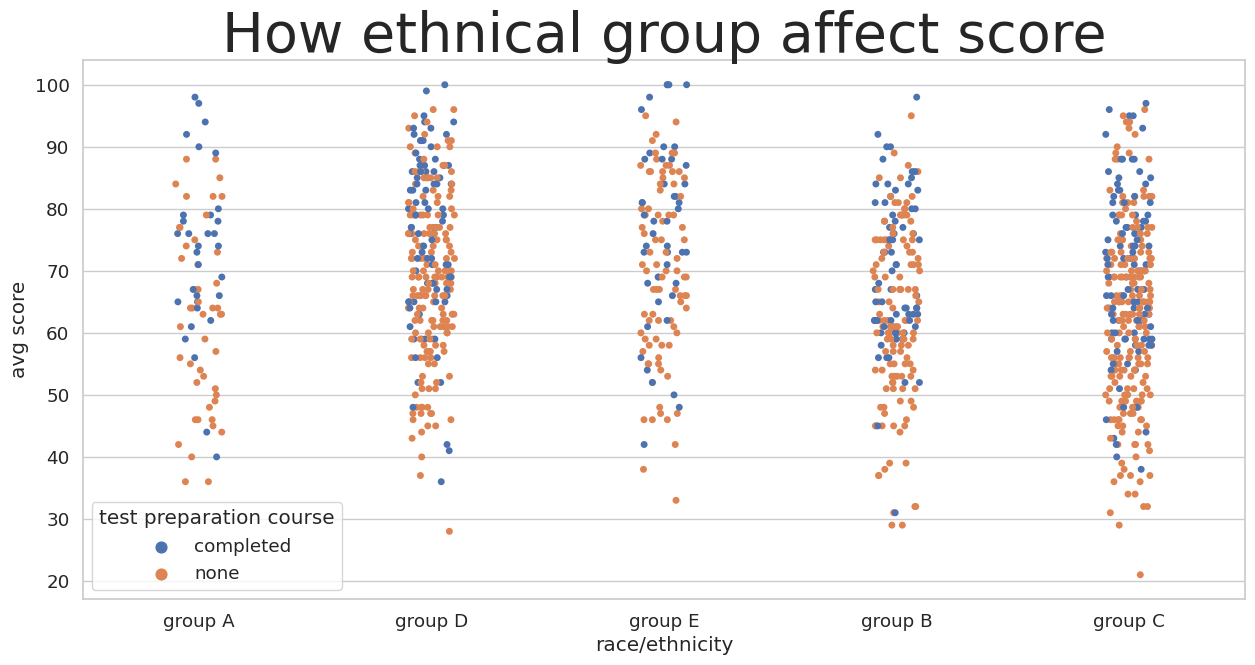

In [184]:
sns.stripplot(x= 'race/ethnicity', y= 'avg score', hue= 'test preparation course', data= df)
plt.title('How ethnical group affect score', fontsize= 40)

## Data Preprocessing

In [185]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
28,female,group B,high school,standard,completed,84
174,male,group B,some college,standard,completed,76
810,female,group C,some high school,standard,none,47
124,female,group D,associate's degree,standard,none,79
32,male,group A,some high school,free/reduced,completed,40


### Gender

In [186]:
gender = {
    'male': 0,
    'female': 1
}

In [187]:
df['gender'] = df['gender'].map(gender)

### race/ethnicity

In [188]:
df['race/ethnicity'].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [189]:
eth = {
    'group A': 0,
    'group E': 1,
    'group B': 2,
    'group D': 3,
    'group C': 4
}

In [190]:
df['race/ethnicity'] = df['race/ethnicity'].map(eth)

In [191]:
df['race/ethnicity'].value_counts()

4    323
3    262
2    205
1    131
0     79
Name: race/ethnicity, dtype: int64

### Test prepation course

In [192]:
tpc = {
    'none': 0,
    'completed': 1
}

In [193]:
df['test preparation course'] = df['test preparation course'].map(tpc)

In [194]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
678,1,4,some college,standard,0,68
652,1,4,some high school,standard,1,96
20,1,4,associate's degree,standard,0,82
257,1,1,some high school,standard,0,69
521,1,4,bachelor's degree,standard,1,76


### Clasify Data

In [195]:
nums = df.select_dtypes(exclude= 'object').columns
nums

Index(['gender', 'race/ethnicity', 'test preparation course', 'avg score'], dtype='object')

In [196]:
cats = df.select_dtypes(include= 'object').columns
cats

Index(['parental level of education', 'lunch'], dtype='object')

### Handling nominal data

In [197]:
df = pd.get_dummies(df, columns= cats, drop_first= True)

### Splitting Data

In [198]:
# Define dataset
X, y = df.drop('avg score', axis= 1), df['avg score']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

In [199]:
X_train

,gender,race/ethnicity,test preparation course,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard
105,1,3,0,1,0,0,0,0,1
68,0,2,0,0,1,0,0,0,1
479,0,4,0,0,0,0,0,0,0
399,1,0,1,0,0,0,1,0,0
434,0,4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
835,1,2,0,0,0,0,0,1,1
192,0,1,0,0,0,0,0,1,0
629,0,4,0,0,1,0,0,0,1
559,0,1,0,0,1,0,0,0,0


### Handling numerical

In [200]:
nums = nums.drop('avg score')

In [201]:
scalar = StandardScaler()
scalar.fit(X_train[nums])

StandardScaler()

In [202]:
X_train[nums] = scalar.transform(X_train[nums])
X_test[nums] = scalar.transform(X_test[nums])

## Modeling

In [216]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Linear Regression': LinearRegression(),
    'Supported vector machine': svm.SVC(gamma= 'scale'),
    'Decision Tree': DecisionTreeClassifier()
}

In [217]:
Results = {
    'Model': [],
    'Train Score': [],
    'Test Score': [],
    'RMSE': []
}

In [224]:
for name, model in models.items():
    model.fit(X_train, y_train)
    train_s = model.score(X_train, y_train)
    test_s = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    RMSE = mean_squared_error((y_pred), y_test)
    Results['Model'].append(name)
    Results['Train Score'].append(train_s)
    Results['Test Score'].append(test_s)
    Results['RMSE'].append(RMSE)
    print('Model: ', name)
    print('Train Score: ', train_s)
    print('Test Score: ', test_s)
    print('RMSE: ', round(RMSE, 2))
    print('=================================')

Model:  K-Nearest Neighbors
Train Score:  0.21
Test Score:  0.043333333333333335
RMSE:  441.12
Model:  Logistic Regression
Train Score:  0.08285714285714285
Test Score:  0.03
RMSE:  224.87
Model:  Linear Regression
Train Score:  0.28037204209361843
Test Score:  0.14637991554235275
RMSE:  160.91
Model:  Supported vector machine
Train Score:  0.11571428571428571
Test Score:  0.023333333333333334
RMSE:  220.01
Model:  Decision Tree
Train Score:  0.32571428571428573
Test Score:  0.03666666666666667
RMSE:  366.9


In [225]:
scores = pd.DataFrame(Results)

Text(0.5, 1.0, 'Train Score')

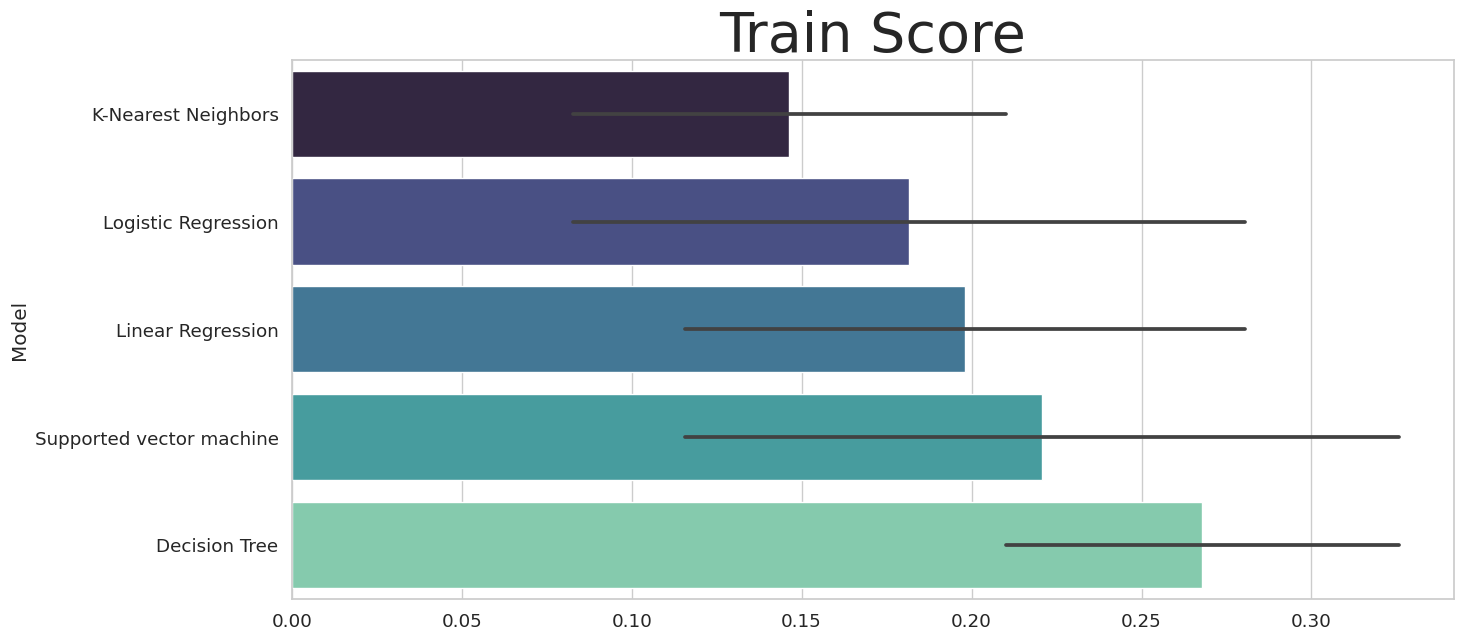

In [226]:
sns.barplot(y= scores['Model'], x= sorted(scores['Train Score']), palette= 'mako')
plt.title('Train Score', fontsize= 40)

Text(0.5, 1.0, 'Test Score')

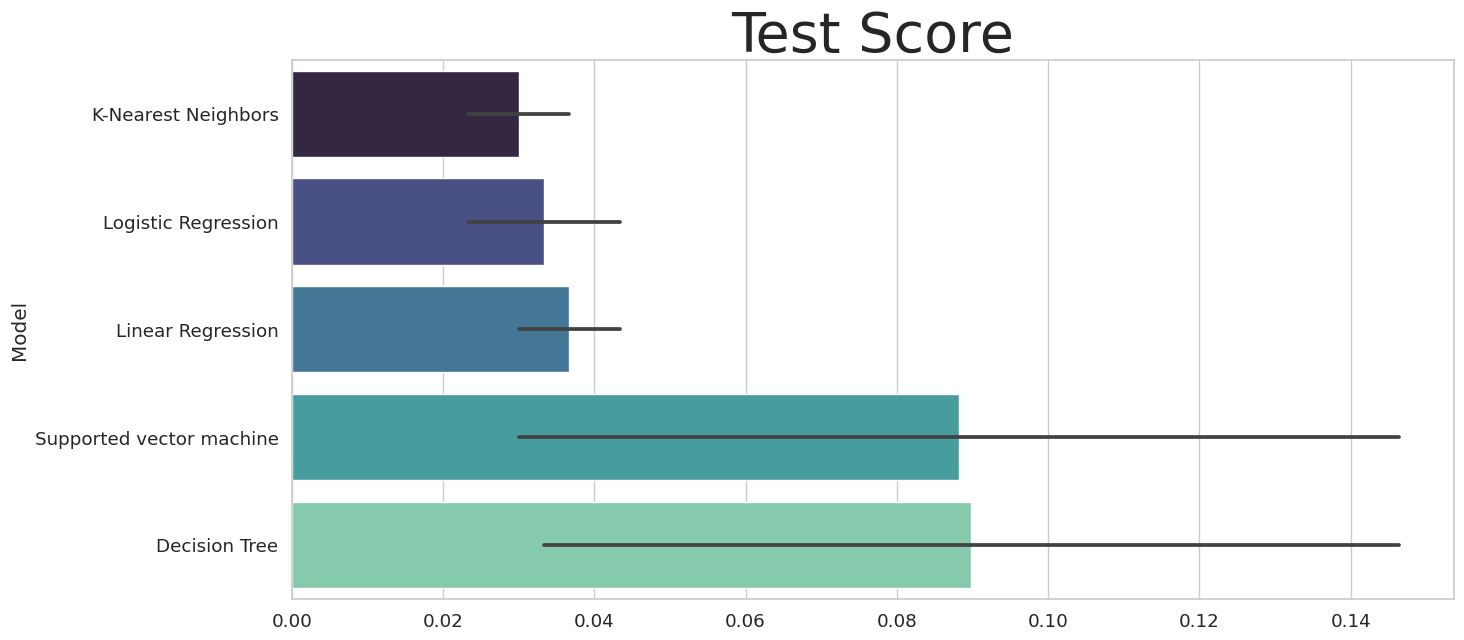

In [230]:
sns.barplot(y= scores['Model'], x= sorted(scores['Test Score']), palette= 'mako')
plt.title('Test Score', fontsize= 40)

Text(0.5, 1.0, 'RMSE')

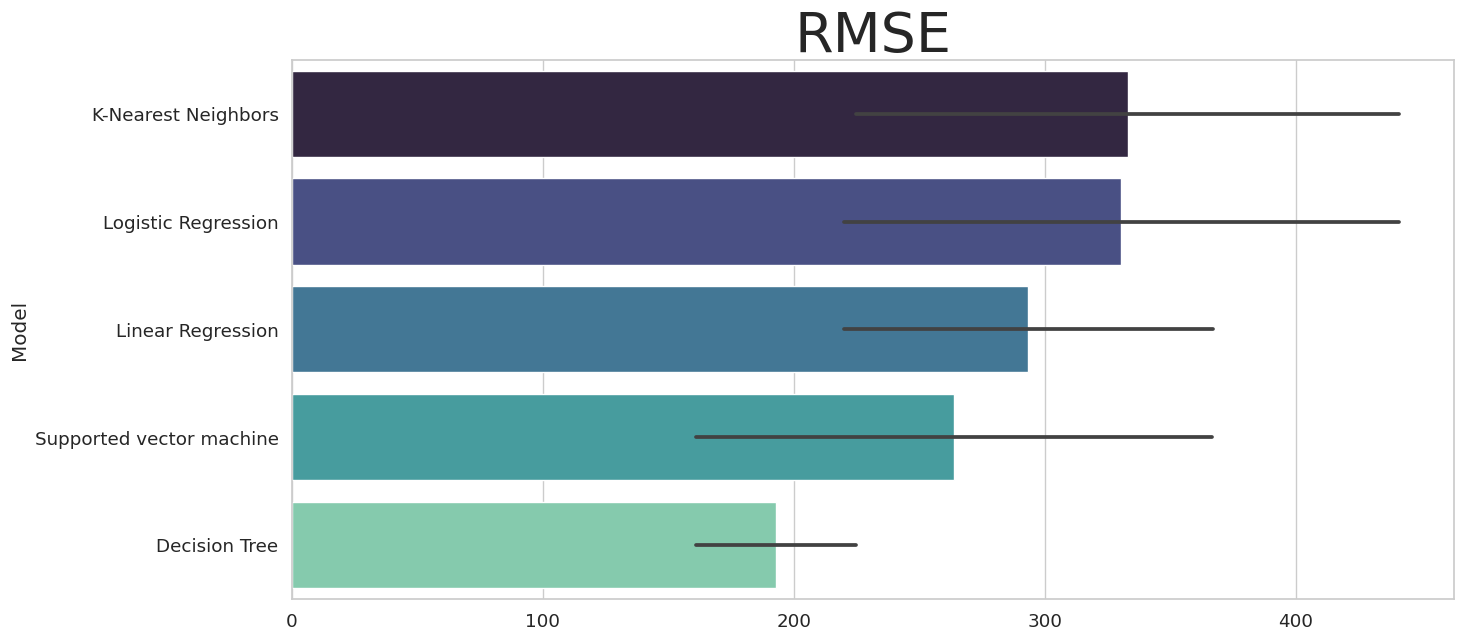

In [228]:
sns.barplot(y= scores['Model'], x= sorted(scores['RMSE'], reverse= True), palette= 'mako')
plt.title("RMSE", fontsize= 40)

## Conclusion

Need to use different algorithms

Current best: <b>Decision Tree</b>